In [1]:
# pip install pandas pyreadstat

# Data Description

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyrsm as rsm

In [3]:
karlan_df = pd.read_stata('karlan_list_2007.dta')
karlan_df.to_csv('karlan_list_2007.csv', index=False)

In [4]:
karlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50083 entries, 0 to 50082
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   treatment           50083 non-null  int8    
 1   control             50083 non-null  int8    
 2   ratio               50083 non-null  category
 3   ratio2              50083 non-null  int8    
 4   ratio3              50083 non-null  int8    
 5   size                50083 non-null  category
 6   size25              50083 non-null  int8    
 7   size50              50083 non-null  int8    
 8   size100             50083 non-null  int8    
 9   sizeno              50083 non-null  int8    
 10  ask                 50083 non-null  category
 11  askd1               50083 non-null  int8    
 12  askd2               50083 non-null  int8    
 13  askd3               50083 non-null  int8    
 14  ask1                50083 non-null  int16   
 15  ask2                50083 non-null  

In [5]:
karlan_df.isnull().sum()

treatment                0
control                  0
ratio                    0
ratio2                   0
ratio3                   0
size                     0
size25                   0
size50                   0
size100                  0
sizeno                   0
ask                      0
askd1                    0
askd2                    0
askd3                    0
ask1                     0
ask2                     0
ask3                     0
amount                   0
gave                     0
amountchange             0
hpa                      0
ltmedmra                 0
freq                     0
years                    1
year5                    0
mrm2                     1
dormant                  0
female                1111
couple                1148
state50one               0
nonlit                 452
cases                  452
statecnt                 0
stateresponse            0
stateresponset           0
stateresponsec           3
stateresponsetminc       3
p

In [6]:
group_cols = ["treatment", "control"]
ratio_cols = ["ratio", "ratio2", "ratio3"]
size_cols = ["size25", "size50", "size100", "sizeno"]
askd_cols = ["ask", "askd1", "askd2", "askd3"]
ask_cols = ["ask1", "ask2", "ask3"]
state_cols = ["red0", "blue0"]
county_cols = ["redcty", "bluecty"]


In [7]:
karlan_df["group"] = karlan_df[group_cols].idxmax(axis=1)
karlan_df["county"] = karlan_df[county_cols].idxmax(axis=1).map({"redcty": "red", "bluecty": "blue"})
karlan_df["state"] = karlan_df[state_cols].idxmax(axis=1).map({"red0": "red", "blue0": "blue"})
karlan_df

/tmp/ipykernel_38392/2551348540.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  karlan_df["county"] = karlan_df[county_cols].idxmax(axis=1).map({"redcty": "red", "bluecty": "blue"})
/tmp/ipykernel_38392/2551348540.py:3: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  karlan_df["state"] = karlan_df[state_cols].idxmax(axis=1).map({"red0": "red", "blue0": "blue"})


,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban,group,county,state
0,0,1,Control,0,0,Control,0,0,0,0,...,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000,control,blue,blue
1,0,1,Control,0,0,Control,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control,red,blue
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000,treatment,blue,blue
3,1,0,1,0,0,Unstated,0,0,0,1,...,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000,treatment,red,blue
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000,treatment,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,1,0,1,0,0,"$25,000",1,0,0,0,...,0.089959,0.257265,2.13,45047.0,0.771316,0.263744,1.000000,treatment,blue,red
50079,0,1,Control,0,0,Control,0,0,0,0,...,0.108889,0.288792,2.67,74655.0,0.741931,0.586466,1.000000,control,blue,blue
50080,0,1,Control,0,0,Control,0,0,0,0,...,0.021311,0.178689,2.36,26667.0,0.778689,0.107930,0.000000,control,red,blue
50081,1,0,3,0,1,Unstated,0,0,0,1,...,0.008257,0.225619,2.57,39530.0,0.733988,0.184768,0.634903,treatment,red,blue


In [ ]:
group = karlan_df["group"].value_counts(normalize=True)
group.plot(kind="bar", color="orange")
plt.title("Group Distribution")
plt.xlabel("Group")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
for i in range(len(group)):
    plt.text(i, group[i], f"{round(group[i]*100, 2)}%", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/2886523009.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, group[i], f"{round(group[i]*100, 2)}%", ha='center', va='bottom')


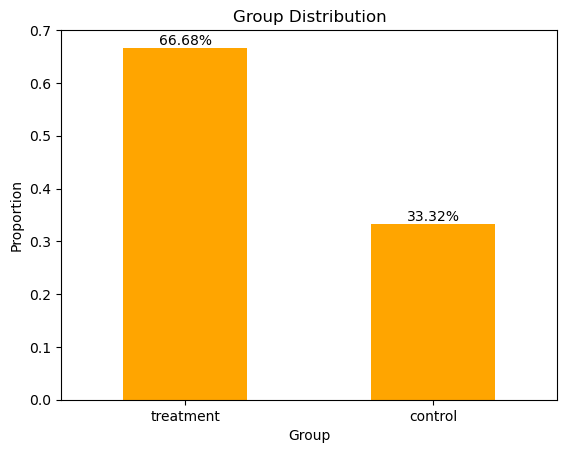

In [8]:
group = karlan_df["group"].value_counts(normalize=True)
group.plot(kind="bar", color="orange")
plt.title("Group Distribution")
plt.xlabel("Group")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
for i in range(len(group)):
    plt.text(i, group[i], f"{round(group[i]*100, 2)}%", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/3747464993.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ratios[i], f"{round(ratios[i]*100, 2)}%", ha='center', va='bottom')


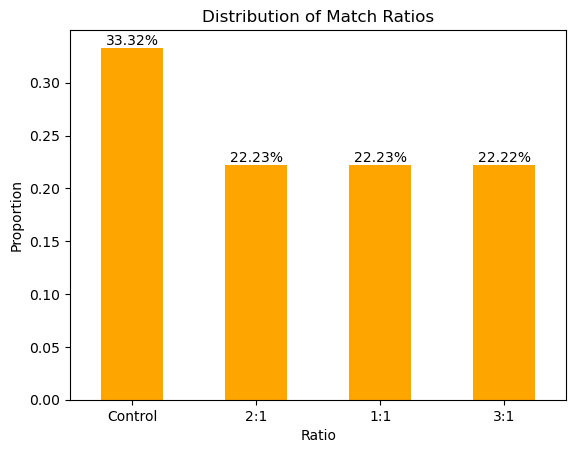

In [9]:
ratios = karlan_df["ratio"].map({1: "1:1", 2: "2:1", 3: "3:1", "Control": "Control"}).value_counts(normalize=True)
ratios.plot(kind="bar", color="orange")
plt.title("Distribution of Match Ratios")
plt.xlabel("Ratio")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
for i in range(len(ratios)):
    plt.text(i, ratios[i], f"{round(ratios[i]*100, 2)}%", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/248569292.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, sizes[i], f"{round(sizes[i]*100, 2)}%", ha='center', va='bottom')


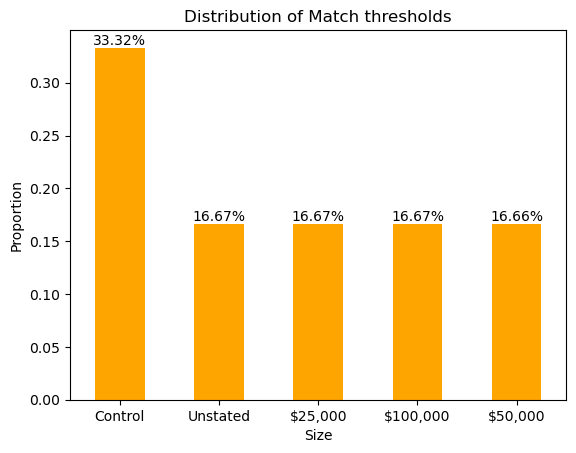

In [10]:
sizes = karlan_df["size"].value_counts(normalize=True)
sizes.plot(kind="bar", color="orange")
plt.title("Distribution of Match thresholds")
plt.xlabel("Size")
plt.ylabel("Proportion")
for i in range(len(sizes)):
    plt.text(i, sizes[i], f"{round(sizes[i]*100, 2)}%", ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_38392/182013770.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, asks[i], f"{round(asks[i]*100, 2)}%", ha='center', va='bottom')


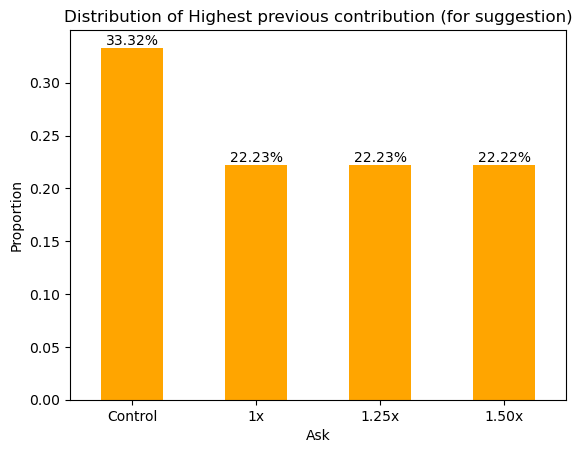

In [11]:
asks = karlan_df["ask"].value_counts(normalize=True)
asks.plot(kind="bar", color="orange")
plt.title("Distribution of Highest previous contribution (for suggestion)")
plt.xlabel("Ask")
plt.ylabel("Proportion")
for i in range(len(asks)):
    plt.text(i, asks[i], f"{round(asks[i]*100, 2)}%", ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

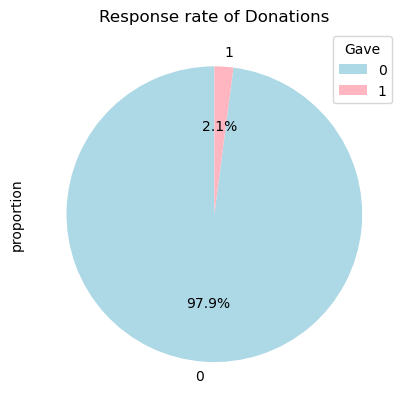

In [12]:
gave = karlan_df["gave"].value_counts(normalize=True)
ax = gave.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightblue","lightpink"])
plt.title("Response rate of Donations")
plt.legend(title="Gave", loc="upper right")
plt.show()

/tmp/ipykernel_38392/1169144851.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ax[i], f"{round(ax[i])}", ha='center', va='bottom')


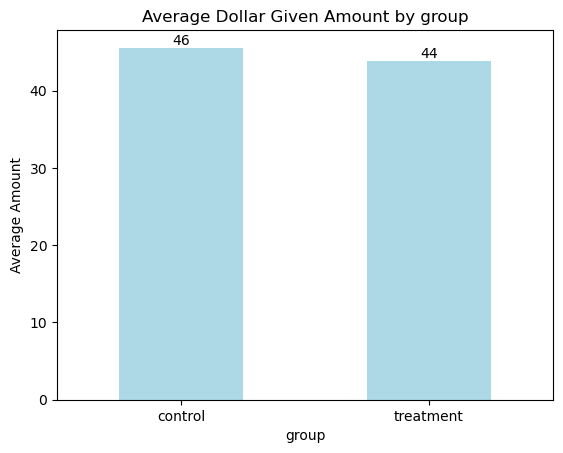

In [13]:
ax = karlan_df[karlan_df['gave'] == 1].groupby("group")["amount"].mean()
ax.plot(kind='bar', color='lightblue')

plt.title("Average Dollar Given Amount by group")
plt.xlabel("group")
plt.ylabel("Average Amount")
plt.xticks(rotation=0)
for i in range(len(ax)):
    plt.text(i, ax[i], f"{round(ax[i])}", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/1509173456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gave1_ratio = karlan_df[karlan_df['gave'] == 1].groupby(karlan_df["ratio"].map({1: "1:1", 2: "2:1", 3: "3:1", "Control": "Control"}))['amount'].mean()
/tmp/ipykernel_38392/1509173456.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, gave1_ratio[i], f"{round(gave1_ratio[i])}", ha='center', va='bottom')


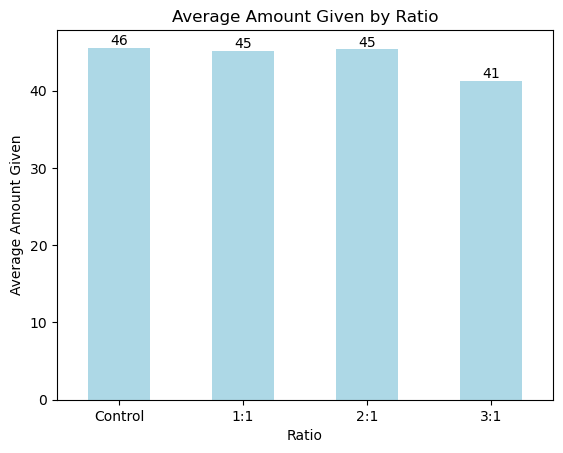

In [14]:
gave1_ratio = karlan_df[karlan_df['gave'] == 1].groupby(karlan_df["ratio"].map({1: "1:1", 2: "2:1", 3: "3:1", "Control": "Control"}))['amount'].mean()
gave1_ratio.plot(kind="bar", color="lightblue")
plt.title("Average Amount Given by Ratio")
plt.xlabel("Ratio")
plt.ylabel("Average Amount Given")
plt.xticks(rotation=0)
for i in range(len(gave1_ratio)):
    plt.text(i, gave1_ratio[i], f"{round(gave1_ratio[i])}", ha='center', va='bottom')
plt.show()


/tmp/ipykernel_38392/1746374688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = karlan_df[karlan_df["gave"] == 1].groupby("size")["amount"].mean()
/tmp/ipykernel_38392/1746374688.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ax[i], f"{round(ax[i])}", ha='center', va='bottom')


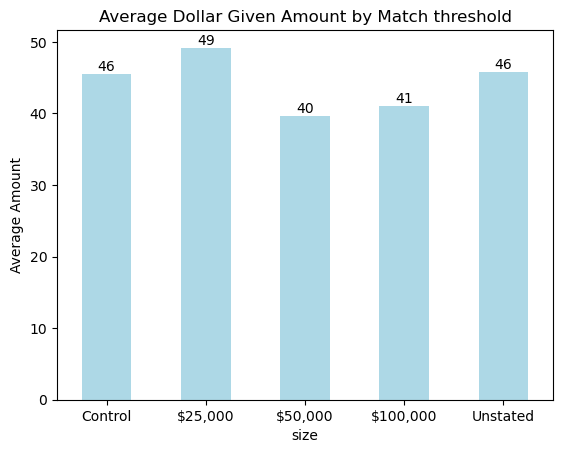

In [15]:
ax = karlan_df[karlan_df["gave"] == 1].groupby("size")["amount"].mean()
ax.plot(kind='bar', color='lightblue')
plt.title("Average Dollar Given Amount by Match threshold")
plt.xlabel("size")
plt.ylabel("Average Amount")
plt.xticks(rotation=0)
for i in range(len(ax)):
    plt.text(i, ax[i], f"{round(ax[i])}", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/2640907076.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, grouped_county[i], f"{round(grouped_county[i])}", ha='center', va='bottom')
/tmp/ipykernel_38392/2640907076.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].text(i, grouped_county[i], f"{round(grouped_county[i]*100, 2)}%", ha='center', va='bottom')


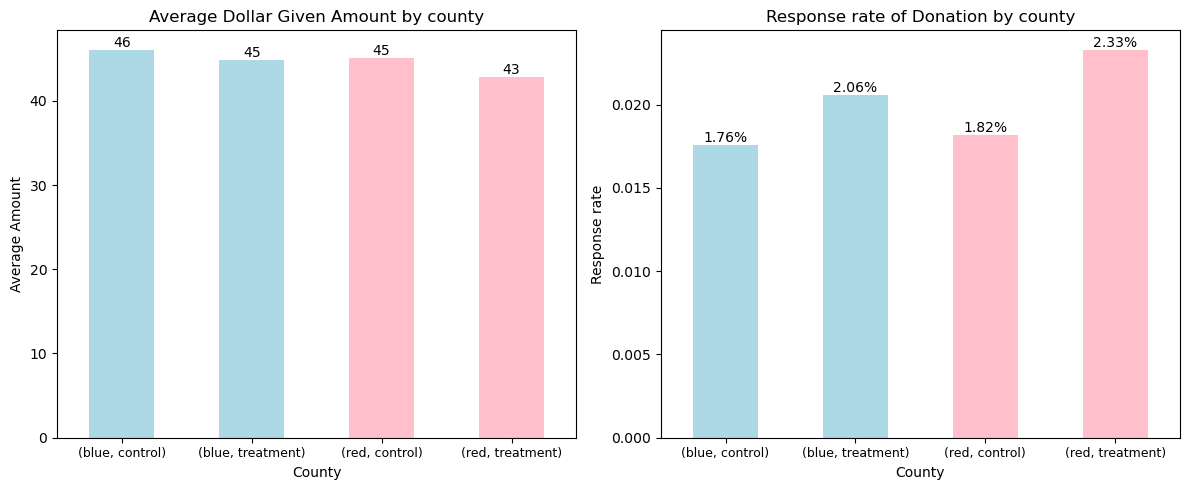

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Plot 1: Average Dollar Given Amount by county
grouped_county = karlan_df[karlan_df["gave"] == 1].groupby(["county", "group"])["amount"].mean()
colors = ["pink" if county == "red" else "lightblue" for county, _ in grouped_county.index]

grouped_county.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title("Average Dollar Given Amount by county")
axes[0].set_xlabel("County")
axes[0].set_ylabel("Average Amount")
axes[0].tick_params(axis='x', rotation=0, labelsize=9)  # Adjust the fontsize here
for i in range(len(grouped_county)):
    axes[0].text(i, grouped_county[i], f"{round(grouped_county[i])}", ha='center', va='bottom')

# Plot 2: Response rate of Donation by county
grouped_county = karlan_df.groupby(["county", "group"])["gave"].mean()
colors = ["pink" if county == "red" else "lightblue" for county, _ in grouped_county.index]

grouped_county.plot(kind='bar', color=colors, ax=axes[1])
axes[1].set_title("Response rate of Donation by county")
axes[1].set_xlabel("County")
axes[1].set_ylabel("Response rate")
axes[1].tick_params(axis='x', rotation=0, labelsize=9)  # Adjust the fontsize here
for i in range(len(grouped_county)):
    axes[1].text(i, grouped_county[i], f"{round(grouped_county[i]*100, 2)}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipykernel_38392/3334000609.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped_county[i], f"{round(grouped_county[i])}", ha='center', va='bottom')


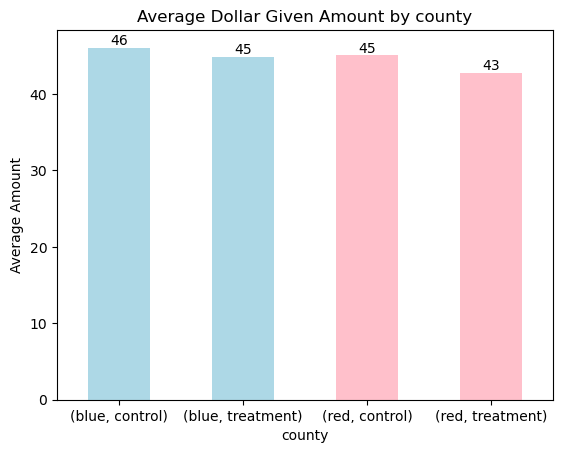

In [16]:
grouped_county = karlan_df[karlan_df["gave"] == 1].groupby(["county", "group"])["amount"].mean()
colors = ["pink" if county == "red" else "lightblue" for county,_ in grouped_county.index]

grouped_county.plot(kind='bar', color=colors)
plt.title("Average Dollar Given Amount by county")
plt.xlabel("county")
plt.ylabel("Average Amount")
plt.xticks(rotation=0)
for i in range(len(grouped_county)):
    plt.text(i, grouped_county[i], f"{round(grouped_county[i])}", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/683103117.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped_county[i], f"{round(grouped_county[i]*100, 2)}%", ha='center', va='bottom')


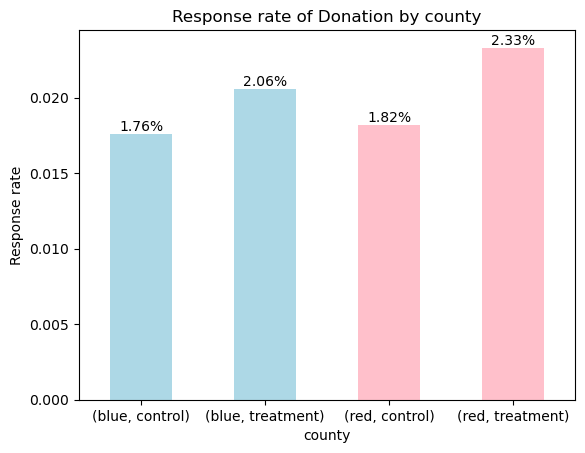

In [17]:
grouped_county = karlan_df.groupby(["county", "group"])["gave"].mean()
colors = ["pink" if county == "red" else "lightblue" for county,_ in grouped_county.index]

grouped_county.plot(kind='bar', color=colors)
plt.title("Response rate of Donation by county")
plt.xlabel("county")
plt.ylabel("Response rate")
plt.xticks(rotation=0)
for i in range(len(grouped_county)):
    plt.text(i, grouped_county[i], f"{round(grouped_county[i]*100, 2)}%", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/3635852891.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, grouped[i], f"{round(grouped[i])}", ha='center', va='bottom')
/tmp/ipykernel_38392/3635852891.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].text(i, grouped[i], f"{round(grouped[i]*100, 2)}%", ha='center', va='bottom')


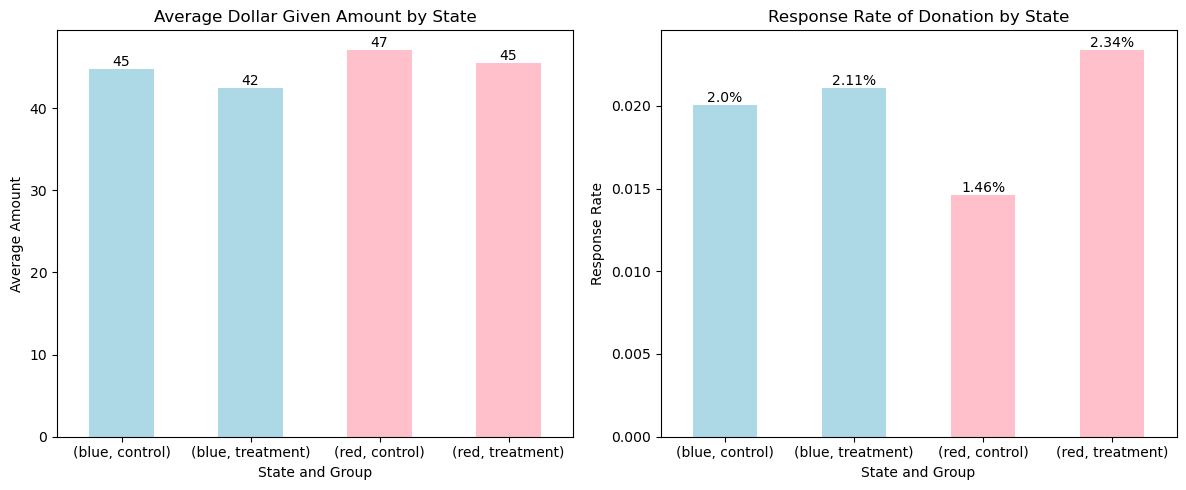

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Plot 1: Average Dollar Given Amount by State
grouped = karlan_df[karlan_df["gave"] == 1].groupby(["state", "group"])["amount"].mean()
colors = ["lightblue" if state == "blue" else "pink" for state, _ in grouped.index]

grouped.plot(kind="bar", color=colors, ax=axes[0])
axes[0].set_title("Average Dollar Given Amount by State")
axes[0].set_xlabel("State and Group")
axes[0].set_ylabel("Average Amount")
axes[0].tick_params(axis='x', rotation=0)
for i in range(len(grouped)):
    axes[0].text(i, grouped[i], f"{round(grouped[i])}", ha='center', va='bottom')

# Plot 2: Response Rate of Donation by State
grouped = karlan_df.groupby(["state", "group"])["gave"].mean()
colors = ["lightblue" if state == "blue" else "pink" for state, _ in grouped.index]

grouped.plot(kind="bar", color=colors, ax=axes[1])
axes[1].set_title("Response Rate of Donation by State")
axes[1].set_xlabel("State and Group")
axes[1].set_ylabel("Response Rate")
axes[1].tick_params(axis='x', rotation=0)
for i in range(len(grouped)):
    axes[1].text(i, grouped[i], f"{round(grouped[i]*100, 2)}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipykernel_38392/4144588813.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped[i], f"{round(grouped[i])}", ha='center', va='bottom')


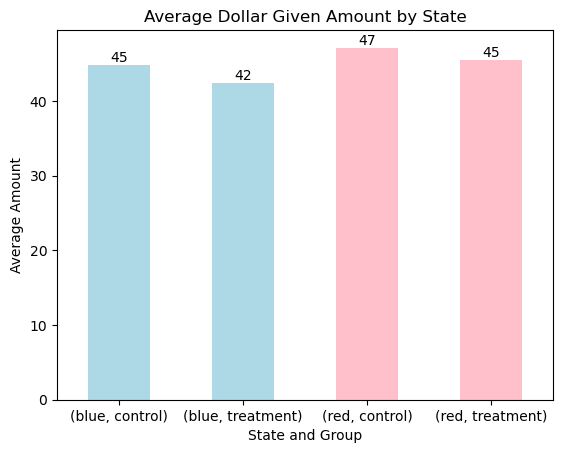

In [18]:
grouped = karlan_df[karlan_df["gave"] == 1].groupby(["state", "group"])["amount"].mean()
colors = ["lightblue" if state == "blue" else "pink" for state, _ in grouped.index]

grouped.plot(kind="bar", color=colors)

plt.title("Average Dollar Given Amount by State")
plt.xlabel("State and Group")
plt.ylabel("Average Amount")
plt.xticks(rotation=0)
for i in range(len(grouped)):
    plt.text(i, grouped[i], f"{round(grouped[i])}", ha='center', va='bottom')
plt.show()

/tmp/ipykernel_38392/154559919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped[i], f"{round(grouped[i]*100, 2)}%", ha='center', va='bottom')


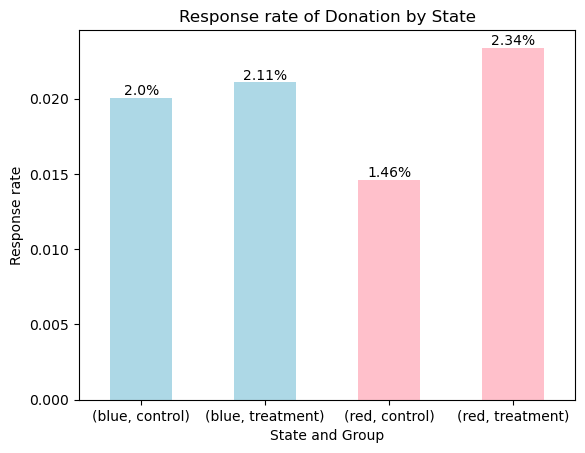

In [19]:
grouped = karlan_df.groupby(["state", "group"])["gave"].mean()
colors = ["lightblue" if state == "blue" else "pink" for state, _ in grouped.index]

grouped.plot(kind="bar", color=colors)

plt.title("Response rate of Donation by State")
plt.xlabel("State and Group")
plt.ylabel("Response rate")
plt.xticks(rotation=0)
for i in range(len(grouped)):
    plt.text(i, grouped[i], f"{round(grouped[i]*100, 2)}%", ha='center', va='bottom')
plt.show()

In [20]:
karlan_df[['gave', 'median_hhincome', 'pwhite', 'page18_39']].describe()

,gave,median_hhincome,pwhite,page18_39
count,50083.000000,48209.000000,48217.000000,48217.000000
mean,0.020646,54815.700533,0.819599,0.321694
std,0.142197,22027.316665,0.168560,0.103039
min,0.000000,5000.000000,0.009418,0.000000
25%,0.000000,39181.000000,0.755845,0.258311
50%,0.000000,50673.000000,0.872797,0.305534
75%,0.000000,66005.000000,0.938827,0.369132
max,1.000000,200001.000000,1.000000,0.997544


# Balance Test 

### non-outcome variable: `mrm2`

In [21]:
from scipy import stats

# group by treatment and control
treated_mrm2 = karlan_df[karlan_df['group'] == "treatment"]['mrm2'].dropna()
control_mrm2 = karlan_df[karlan_df['group'] == "control"]['mrm2'].dropna()

# t-test
t_stat, p_val = stats.ttest_ind(treated_mrm2, control_mrm2, equal_var=True)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: 0.119, p-value: 0.905


In [54]:
reg = rsm.model.regress({"dakarlan": karlan_df}, rvar="treatment", evar="mrm2")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : dakarlan
Response variable    : treatment
Explanatory variables: mrm2
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.667      0.003  215.360  < .001  ***
mrm2             0.000      0.000    0.119   0.905     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [56]:
import statsmodels.api as sm

# regression analysis
X = sm.add_constant(karlan_df['treatment'])
y = karlan_df['mrm2']
model = sm.OLS(y, X, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mrm2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01428
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.905
Time:                        20:34:15   Log-Likelihood:            -1.9585e+05
No. Observations:               50082   AIC:                         3.917e+05
Df Residuals:                   50080   BIC:                         3.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9981      0.094    138.979      0.0

### non-outcome variable: `median_hhincome`

In [24]:
treated_mh = karlan_df[karlan_df['group'] == "treatment"]['median_hhincome'].dropna()
control_mh = karlan_df[karlan_df['group'] == "control"]['median_hhincome'].dropna()

t_stat, p_val = stats.ttest_ind(treated_mh, control_mh, equal_var=True)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: -0.742, p-value: 0.458


In [57]:
reg = rsm.model.regress({"dakarlan": karlan_df}, rvar="treatment", evar="median_hhincome")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : dakarlan
Response variable    : treatment
Explanatory variables: median_hhincome
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

                 coefficient  std.error  t.value p.value     
Intercept              0.671      0.006  116.647  < .001  ***
median_hhincome       -0.000      0.000   -0.742   0.458     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### non-outcome variable: `freq`

In [26]:
treated_freq = karlan_df[karlan_df['group'] == "treatment"]['freq'].dropna()
control_freq = karlan_df[karlan_df['group'] == "control"]['freq'].dropna()

t_stat, p_val = stats.ttest_ind(treated_freq, control_freq, equal_var=True)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: -0.111, p-value: 0.912


In [58]:
reg = rsm.model.regress({"karlan": karlan_df}, rvar="treatment", evar="freq")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : karlan
Response variable    : treatment
Explanatory variables: freq
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.667      0.003  258.746  < .001  ***
freq            -0.000      0.000   -0.111   0.912     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### non-outcome variable: `female`

In [28]:
treated_female = karlan_df[karlan_df["group"] == "treatment"]["female"].dropna()
control_female = karlan_df[karlan_df["group"] == "control"]["female"].dropna()

t_test, p_val = stats.ttest_ind(treated_female, control_female, equal_var=True)
print(f"t-statistic: {t_test:.3f}, p-value: {p_val:.3f}")

t-statistic: -1.758, p-value: 0.079


In [59]:
reg = rsm.model.regress({"dakarlan": karlan_df}, rvar="treatment", evar="female")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : dakarlan
Response variable    : treatment
Explanatory variables: female
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.669      0.003  266.731  < .001  ***
female          -0.008      0.005   -1.758   0.079    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Experimental Results


### Charitable Contribution Made

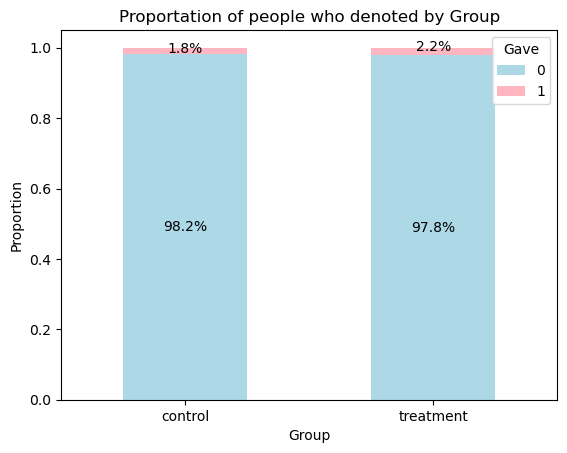

In [30]:
gave_by_group = karlan_df.groupby("group")["gave"].value_counts(normalize=True).unstack()
gave_by_group.plot(kind="bar", stacked=True, color=("lightblue", "lightpink"))
plt.title("Proportation of people who denoted by Group")
plt.xlabel("Group")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Gave", loc="upper right")

for i, (gave_by_group, row) in enumerate(gave_by_group.iterrows()):
    for j, value in enumerate(row):
        if j == 1:
            plt.text(i, value+1, f"{value*100:.1f}%", ha="center", va="top", fontsize=10)
        else:
            plt.text(i, value/2, f"{value*100:.1f}%", ha="center", va="center", fontsize=10)
plt.show()

In [31]:
treated_gave = karlan_df[karlan_df['group'] == "treatment"]['gave'].dropna()
control_gave = karlan_df[karlan_df['group'] == "control"]['gave'].dropna()

t_stat, p_val = stats.ttest_ind(treated_gave, control_gave, equal_var=True)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: 3.101, p-value: 0.002


In [32]:
from statsmodels.discrete.discrete_model import Probit

X = sm.add_constant(karlan_df["treatment"])
probit_model = Probit(karlan_df["gave"], X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        20:16:14   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

### Differences between Match Rates

In [49]:
ratio_gave = karlan_df[karlan_df["ratio"] == 1]["gave"].dropna()
ratio2_gave = karlan_df[karlan_df["ratio"] == 2]["gave"].dropna()
ratio3_gave = karlan_df[karlan_df["ratio"] == 3]["gave"].dropna()
ratio_control_gave = karlan_df[karlan_df["ratio"] == "Control"]["gave"].dropna()

pairs = [
    ("ratio1 & ratio2", ratio_gave, ratio2_gave),
    ("ratio1 & ratio3", ratio_gave, ratio3_gave),
    ("ratio1 & control", ratio_gave, ratio_control_gave),
    ("ratio2 & ratio3", ratio2_gave, ratio3_gave),
    ("ratio2 & control", ratio2_gave, ratio_control_gave),
    ("ratio3 & control", ratio3_gave, ratio_control_gave),
]

for label, group1, group2 in pairs:
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)
    print(f"{label}: t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")


ratio1 & ratio2: t-statistic: -0.965, p-value: 0.335
ratio1 & ratio3: t-statistic: -1.015, p-value: 0.310
ratio1 & control: t-statistic: 1.730, p-value: 0.084
ratio2 & ratio3: t-statistic: -0.050, p-value: 0.960
ratio2 & control: t-statistic: 2.804, p-value: 0.005
ratio3 & control: t-statistic: 2.859, p-value: 0.004


In [60]:
reg = rsm.model.regress({"karlan": karlan_df}, rvar="gave", evar="ratio")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : karlan
Response variable    : gave
Explanatory variables: ratio
Null hyp.: the effect of x on gave is zero
Alt. hyp.: the effect of x on gave is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.018      0.001   16.225  < .001  ***
ratio[1]         0.003      0.002    1.661   0.097    .
ratio[2]         0.005      0.002    2.744   0.006   **
ratio[3]         0.005      0.002    2.802   0.005   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


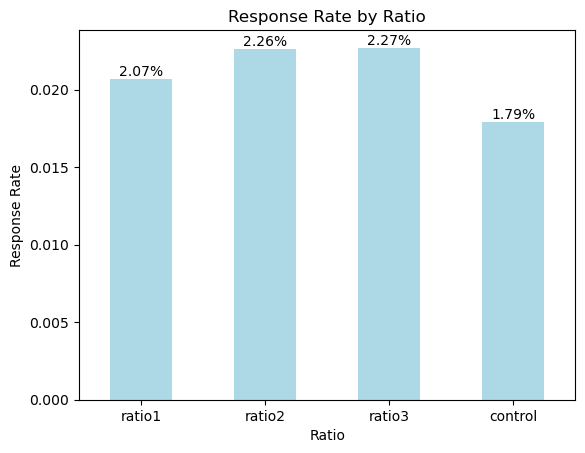

In [35]:
response_rate_ratio1 = karlan_df[karlan_df["ratio"] == 1]["gave"].mean().round(4)
response_rate_ratio2 = karlan_df[karlan_df["ratio"] == 2]["gave"].mean().round(4)
response_rate_ratio3 = karlan_df[karlan_df["ratio"] == 3]["gave"].mean().round(4)
response_rate_control = karlan_df[karlan_df["ratio"] == "Control"]["gave"].mean().round(4)
response_rate = pd.Series({
    "ratio1": response_rate_ratio1,
    "ratio2": response_rate_ratio2,
    "ratio3": response_rate_ratio3,
    "control": response_rate_control
})
response_rate
response_rate.plot(kind="bar", color="lightblue")
plt.title("Response Rate by Ratio")
plt.xlabel("Ratio")
plt.ylabel("Response Rate")
plt.xticks(rotation=0)

for i, value in enumerate(response_rate):
    plt.text(i, value, f"{value*100:.2f}%", ha="center", va="bottom", fontsize=10)
plt.show()

### Size of Charitable Contribution

In [36]:
treated_amount = karlan_df[karlan_df['group'] == "treatment"]['amount'].dropna()
control_amount = karlan_df[karlan_df['group'] == "control"]['amount'].dropna()

t_stat, p_val = stats.ttest_ind(treated_amount, control_amount, equal_var=True)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: 1.861, p-value: 0.063


In [52]:
reg = rsm.model.regress({"karlan": karlan_df}, rvar="treatment", evar="amount")
reg.summary(fit=False)


Linear regression (OLS)
Data                 : karlan
Response variable    : treatment
Explanatory variables: amount
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.666      0.002  314.669  < .001  ***
amount           0.000      0.000    1.861   0.063    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [38]:
treated_gave_amount = karlan_df[(karlan_df['group'] == "treatment") & (karlan_df['gave'] == 1)]['amount'].dropna()
control_gave_amount = karlan_df[(karlan_df['group'] == "control") & (karlan_df['gave'] == 1)]['amount'].dropna()

t_stat, p_val = stats.ttest_ind(treated_gave_amount, control_gave_amount, equal_var=True)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

t-statistic: -0.581, p-value: 0.561


In [53]:
reg = rsm.model.regress({"karlan": karlan_df[karlan_df["gave"] == 1]}, rvar="treatment", evar="amount")
reg.summary(fit=False)

Linear regression (OLS)
Data                 : karlan
Response variable    : treatment
Explanatory variables: amount
Null hyp.: the effect of x on treatment is zero
Alt. hyp.: the effect of x on treatment is not zero

           coefficient  std.error  t.value p.value     
Intercept         0.72      0.021   35.055  < .001  ***
amount           -0.00      0.000   -0.581   0.561     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


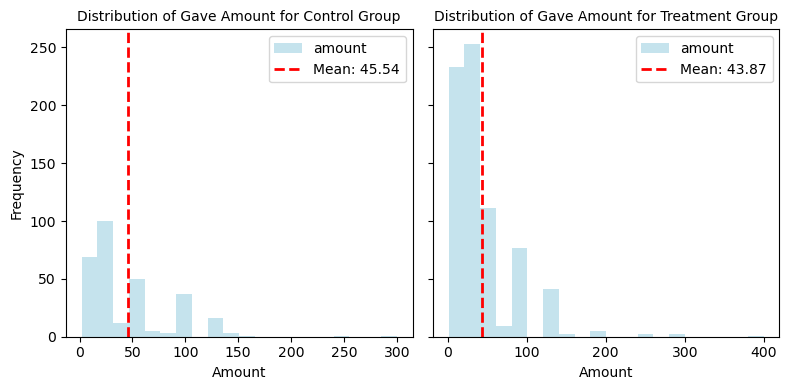

In [64]:
treated_gave_amount = karlan_df[(karlan_df["group"] == "treatment") & (karlan_df['gave'] == 1)]['amount'].dropna()
avg_treated_gave_amount = treated_gave_amount.mean()

control_gave_amount = karlan_df[(karlan_df["group"] == "control") & (karlan_df['gave'] == 1)]['amount'].dropna()
avg_control_gave_amount = control_gave_amount.mean()
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Plot for Control Group
control_gave_amount.plot(kind="hist", bins=20, color="lightblue", alpha=0.7, ax=axes[0])
axes[0].axvline(avg_control_gave_amount, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_control_gave_amount:.2f}")
axes[0].legend()
axes[0].set_title("Distribution of Gave Amount for Control Group", fontsize=10)
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Frequency")

# Plot for Treatment Group
treated_gave_amount.plot(kind="hist", bins=20, color="lightblue", alpha=0.7, ax=axes[1])
axes[1].axvline(avg_treated_gave_amount, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_treated_gave_amount:.2f}")
axes[1].legend()
axes[1].set_title("Distribution of Gave Amount for Treatment Group", fontsize=10)
axes[1].set_xlabel("Amount")

plt.tight_layout()
plt.show()


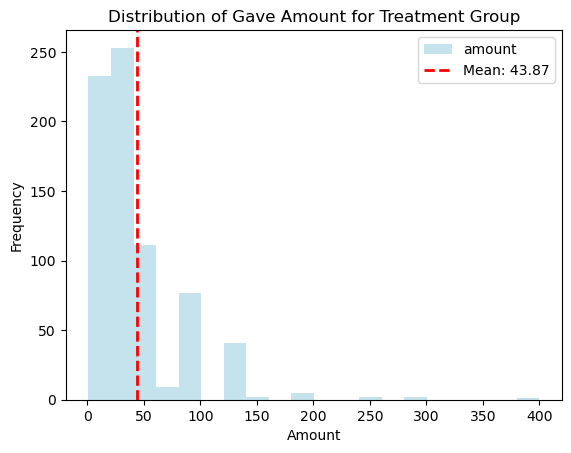

In [41]:
treated_gave_amount = karlan_df[(karlan_df["group"] == "treatment") & (karlan_df['gave'] == 1)]['amount'].dropna()
avg_treated_gave_amount = treated_gave_amount.mean()

treated_gave_amount.plot(kind="hist", bins=20, color="lightblue", alpha=0.7)
plt.axvline(avg_treated_gave_amount, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_treated_gave_amount:.2f}")
plt.legend()
plt.title("Distribution of Gave Amount for Treatment Group")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


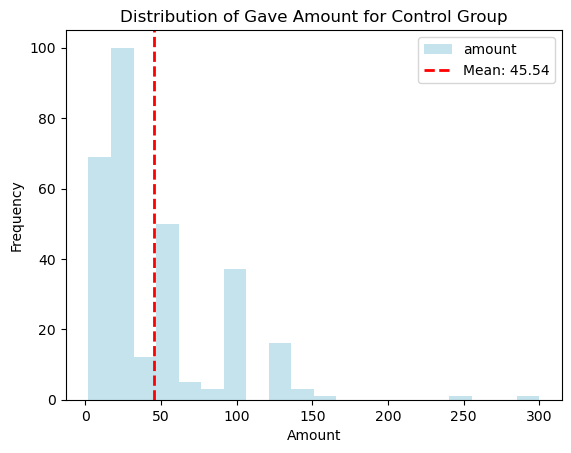

In [42]:
control_gave_amount = karlan_df[(karlan_df["group"] == "control") & (karlan_df['gave'] == 1)]['amount'].dropna()
avg_control_gave_amount = control_gave_amount.mean()

control_gave_amount.plot(kind="hist", bins=20, color="lightblue", alpha=0.7)
plt.axvline(avg_control_gave_amount, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_control_gave_amount:.2f}")
plt.legend()
plt.title("Distribution of Gave Amount for Control Group")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


# Simulation Experiment

### Law of Large Numbers

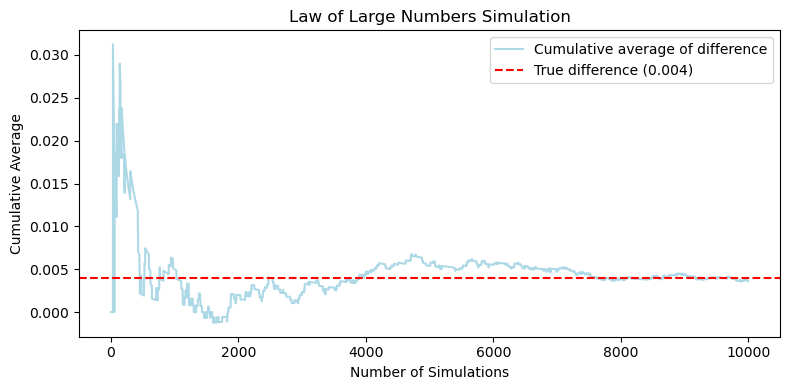

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters Setting
np.random.seed(0)
p_control = 0.018
p_treatment = 0.022
n_control = 100_000
n_treatment = 10_000

# Simulate donatioin outcomes (Bernoulli distribution)
control = np.random.binomial(1, p_control, size=n_control)
treatment = np.random.binomial(1, p_treatment, size=n_treatment)

# Sample the first 10,000 control observations to match treatment
control_sample = control[:n_treatment]

# Difference = treatment - control
diffs = treatment - control_sample

# Calculate the cumulative average of differences
cumulative_avg = np.cumsum(diffs) / np.arange(1, n_treatment + 1)

# Plot the cumulative average and the true difference line
plt.figure(figsize=(8, 4))
plt.plot(cumulative_avg, label="Cumulative average of difference", color="lightblue")
plt.axhline(y=0.004, color="red", linestyle="--", label="True difference (0.004)")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Average")
plt.title("Law of Large Numbers Simulation")
plt.legend()
plt.tight_layout()
plt.show()

### Central Limit Theorem

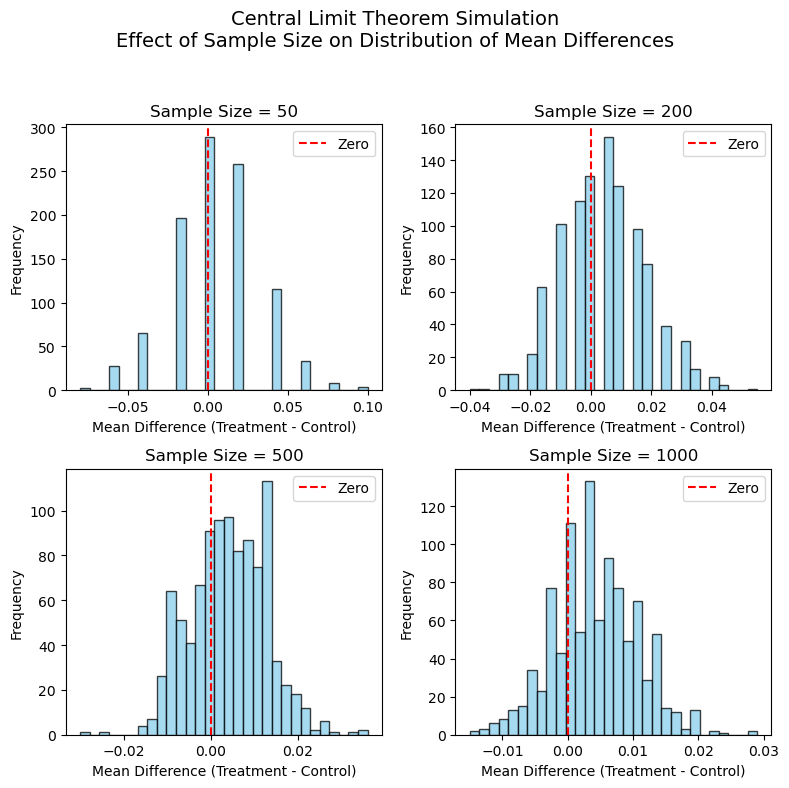

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters Setting
np.random.seed(42)
p_control = 0.018
p_treatment = 0.022
sample_sizes = [50, 200, 500, 1000]
n_simulations = 1000


fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    diffs = []

    # Simulate n_simulations times
    for _ in range(n_simulations):
        control = np.random.binomial(1, p_control, n)
        treatment = np.random.binomial(1, p_treatment, n)
        diff = np.mean(treatment) - np.mean(control)
        diffs.append(diff)

    # Plot the histogram of differences
    ax = axes[idx]
    ax.hist(diffs, bins=30, color="skyblue", edgecolor="black", alpha=0.75)
    ax.axvline(x=0, color="red", linestyle="--", linewidth=1.5, label="Zero")
    ax.set_title(f"Sample Size = {n}")
    ax.set_xlabel("Mean Difference (Treatment - Control)")
    ax.set_ylabel("Frequency")
    ax.legend()

# Add a title for the entire figure
plt.suptitle("Central Limit Theorem Simulation\nEffect of Sample Size on Distribution of Mean Differences", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()